# Homework Draft: Cal EnviroScreen

Developed by Zcjanin Ollesca

---

In this homework, students will gain experience with fundamental Exploratory Data Analysis and model exploration using the CalEnviroScreen data. This homework will build on methods introduced in lab. It will also serve as an application of data science in the field of social sciences and **environmental justice**. According to state law, environmental justice refers to the "fair treatment of people of all races, cultures, and incomes with respect to the development, adoption, implementation and enforcement of environmental laws, regulations, and policies." 

By the end of this homework, students will be able to:
- Perform basic tabular analysis using pandas and interpret results
- Extract data using conditional selection
- Visualize and analyze CalEnviroScreen data
- Identify how data-driven decision making can guide policy and resource allocation

## Table of Contents

1. [Introduction](#1.-introduction)
2. [Exploratory Data Analysis](#exploratory-data-analysis)
3. [Visualizing the Data](#visualizing-the-data)
4. [Data-Driven Decision Making](#data-driven-decision-making)

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import seaborn as sns

---

## 1. Introduction


The [California Communities Environmental Health Screening Tool](https://oehha.ca.gov/calenviroscreen) (CalEnviroScreen) provides accessible demographic and environmental information to identify communities that are susceptible to certain types of pollution. This tool utilizes environmental, health, and socioeconomic information to produce scores for every census tract in California, allowing us to compare qualities of different communities. 

### 1.1 Reading in CalEnviroScreen Data

To begin exploring CalEnviroScreen, run the following cell to read in the data.

In [2]:
# Read in the data

ces = pd.read_csv('enviro.csv')
ces.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95


Before we begin any tabular analysis, let's familiarize ourselves with this DataFrame by looking at its dimensions and the data types of its columns. Run the following code cell to print the dimensions of `ces`.

In [3]:
# Run this cell

print(ces.shape)

(2310, 59)


Now, let's take a look at some of the columns of our DataFrame. RUn the code cell below:

In [4]:
# Run this cell

print(ces.columns)

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       ' CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'DAC category',
       'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM',
       'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl', 'Lead',
       'Lead Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release',
       'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl',
       'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies',
       'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl',
       'Pollution Burden', 'Pollution Burden Score', 'Pollution Burden Pctl',
       'Asthma', 'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic

Let's also examine the data types of some of our columns

In [5]:
# Run this cell to return the data type of the first 10 columns of the DataFrame

ces.dtypes[:10]

Census Tract                  int64
Total Population              int64
California County            object
ZIP                           int64
Approximate Location         object
Longitude                   float64
Latitude                    float64
CES 4.0 Score               float64
 CES 4.0 Percentile         float64
CES 4.0 Percentile Range     object
dtype: object

**Question 1.1a:** Looking at this result, we can see that we will be primarily working with numerical data. Now that we've familiarized ourselves with the data, describe the granularity of `ces`. In other words, what does each row of the DataFrame represent? Refer back to the [CalEnviroScreen](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40) website as needed.

*YOUR ANSWER HERE...*

**Question 1.1b:** Describe the `Pollution_Burden_Pctl` category in the enviro dataset and what it represents by navigating the to the [CalEnviroScreen](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40) website **in your own words**. What is the difference between a high score and a low score? 

*YOUR ANSWER HERE...*

### 1.2 Reading in Community College Data

Let's also read in data containing information about the locations of community colleges in California. We will familiarize ourselves with this data the same way we did for `ces`.

In [6]:
# Read in the data

colleges = pd.read_excel("College_codes_EVDtype.xlsx")
colleges.head()

,OPEID,College,City,State,Zip,yrs,EVDCode
0,111100,ALLAN HANCOCK COLLEGE,SANTA MARIA,CA,93454,2,1
1,111300,ANTELOPE VALLEY COLLEGE,LANCASTER,CA,93534,2,1
2,111500,ARMSTRONG UNIVERSITY,BERKELEY,CA,94704,4,4
3,111600,ART CENTER COLLEGE OF DES,PASADENA,CA,91103,4,4
4,111700,AZUSA PACIFIC UNIVERSITY,AZUSA,CA,91702,4,4


**Question 1.2a:** What are the dimensions of the `colleges` dataset? Fill in the code cell with the necessary code and print your answer.

In [ ]:
# TODO: Fill in the ellipses

shape = ... 
print(shape)

**Question 1.2b:** What are the columns of the dataset?

In [ ]:
# TODO: Write code to print the columns of the enviro dataset

print(...)

**Question 1.2c:** What is the granularity of the `colleges` dataset? What does each row represent? 

*YOUR ANSWER HERE...*

### 1.3 Merging `ces` and `colleges`

Now that we have an understanding of both of our DataFrames, we will merge these two DataFrames to analyze the socioeconomic conditions of various community colleges in California using the [`pd.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function in pandas.

To use `pd.merge()`, we will pass in the following parameters into the function respectively:
- The first DataFrame being merged
- The second DataFrame being merged
- **how** indicates the type of merge to be used
- **left_on** and **right_on** parameters are assigned to the string names of the columns to be used when performing the join. These two on parameters tell pandas what values should act as pairing keys to determine which rows to merge across the DataFrames. We’ll talk more about this idea of a pairing key next lecture.

We will be using an *inner* merge which will use the intersection of keys from both DataFrames( similar to a SQL inner join). It will preserve the order of the left keys.

In [7]:
# Merge enviro and collegecodes

filtered_colleges = colleges[colleges['EVDCode'] != 4]
ces_cc = pd.merge(ces, filtered_colleges, how='inner', left_on='ZIP', right_on='Zip')
ces_cc.shape

(208, 66)

Notice that after joining both of our DataFrames, we are only left with 208 rows. It is important to keep track of the characteristics of our data as we perform manipulations. 

---

## 2. Exploratory Data Analysis

In this next section, we will focus on tabular analysis of the DataFrames that we have constructed. Specifically we will practice utility functions, slicing, conditional selection, and aggregations.

### 2.1 Utility Functions

The attribute, `CES 4.0 Score`, reveals the CalEnviroScreen Score for a given census tract.  Essentially, this score takes into account the `Pollution Burden`, which accounts for factors like air and water quality, and `Population Characteristics`, which assesses the sensitivity of the population to pollution, to measure the socioeconomic conditions across various communities. Higher scores indicate greater cumulative environmental and health burdens. This score aids state agencies, local governments, and community organizations identify communities that are more susceptible to environmental health concerns.

Let's find the most polluted census tracts and show which colleges are impacted.

**Question 2.1.1** Write code to find the top 10 most polluted census tracts and display the colleges using the `CES 4.0 Score` column and the `.sort_values()` function in pandas. Assign it to the variable `most_polluted`. 

If you are feeling stuck, consult the pandas documentation for the function to understand how to use it. Be sure to display the results in *ascending* order

In [8]:
# TODO: Write code to find the most polluted census tracts and display the colleges

most_polluted = ces_cc.sort_values(by='CES 4.0 Score', ascending=False).head(10)
most_polluted

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,OPEID,College,City,State,Zip,yrs,EVDCode
0,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.71,99.94,95-100% (highest scores),...,83.37,8.65,95.46,118800,COMPTON CMTY COLLEGE,COMPTON,CA,90221,2,1
11,6099003700,4669,Stanislaus,95380,Unincorporated Stanislaus County area,-120.883606,37.464793,75.31,99.70,95-100% (highest scores),...,81.37,8.44,93.87,115700,CALIF ST UNIV STANISLAUS,TURLOCK,CA,95380,4,2
1,6037542200,7155,Los Angeles,90221,Compton,-118.197151,33.886893,73.92,99.57,95-100% (highest scores),...,84.83,8.80,96.52,118800,COMPTON CMTY COLLEGE,COMPTON,CA,90221,2,1
2,6037542401,4735,Los Angeles,90221,Compton,-118.210904,33.892362,73.16,99.48,95-100% (highest scores),...,88.46,9.18,98.68,118800,COMPTON CMTY COLLEGE,COMPTON,CA,90221,2,1
19,6037294701,3099,Los Angeles,90744,Los Angeles,-118.254908,33.778016,71.29,99.27,95-100% (highest scores),...,81.46,8.45,93.99,122400,LOS ANGELES HARBOR COLLEG,WILMINGTON,CA,90744,2,1
12,6099003802,5339,Stanislaus,95380,Turlock,-120.857699,37.486126,66.71,98.35,95-100% (highest scores),...,80.89,8.39,93.38,115700,CALIF ST UNIV STANISLAUS,TURLOCK,CA,95380,4,2
34,6071004900,7113,San Bernardino,92410,San Bernardino,-117.316879,34.100314,66.66,98.31,95-100% (highest scores),...,91.41,9.48,99.43,127200,SAN BERNARDINO VALLEY COL,SN BERNRDNO,CA,92410,2,1
43,6047001302,2873,Merced,95340,Merced,-120.478191,37.304035,66.50,98.25,95-100% (highest scores),...,96.40,10.00,100.00,123700,MERCED COLLEGE,MERCED,CA,95340,2,1
44,6047001301,2662,Merced,95340,Merced,-120.491786,37.307192,66.41,98.21,95-100% (highest scores),...,87.78,9.11,98.32,123700,MERCED COLLEGE,MERCED,CA,95340,2,1
48,6019006802,3339,Fresno,93654,Unincorporated Fresno County area,-119.497435,36.599505,66.35,98.17,95-100% (highest scores),...,90.41,9.38,99.26,130800,REEDLEY COLLEGE,REEDLEY,CA,93654,2,1


We will use the `.unique()` function to figure out the unique cities in this DataFrame. Run the code cell below:

In [9]:
# Run this cell

most_polluted['City'].unique()

array(['COMPTON', 'TURLOCK', 'WILMINGTON', 'SN BERNRDNO', 'MERCED',
       'REEDLEY'], dtype=object)

**Question 2.1.2:** Now, find the 10 least polluted zip codes, assign it to the variable `least_polluted` and show the colleges there using the code cell below. 

*Hint: You may find the `ascending=` parameter of the `.sort_values()` function useful*

In [10]:
# TODO: Write code to find the least polluted zip codes and display the colleges

least_polluted = ces_cc.sort_values(by='CES 4.0 Score', ascending=True).head(10)
least_polluted

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,OPEID,College,City,State,Zip,yrs,EVDCode
157,6099001002,3284,Stanislaus,95350,Modesto,-120.978323,37.654742,26.51,52.02,50-55%,...,46.76,4.85,45.37,124000,MODESTO JR COLLEGE,MODESTO,CA,95350,2,1
90,6071010802,3820,San Bernardino,92407,Unincorporated San Bernardino County area,-117.352081,34.270082,26.77,52.58,50-55%,...,47.01,4.88,45.79,114200,CALIF ST UNIV SAN BERNARD,SN BERNRDNO,CA,92407,4,2
18,6099003908,2428,Stanislaus,95380,Turlock,-120.854306,37.506439,29.72,58.16,55-60%,...,59.88,6.21,65.48,115700,CALIF ST UNIV STANISLAUS,TURLOCK,CA,95380,4,2
122,6037554600,4173,Los Angeles,90650,Norwalk,-118.089292,33.883645,31.87,62.14,60-65%,...,49.56,5.14,49.61,116100,CERRITOS COLLEGE,NORWALK,CA,90650,2,1
156,6099000909,5437,Stanislaus,95350,Modesto,-120.984276,37.673238,32.39,63.17,60-65%,...,55.92,5.80,59.38,124000,MODESTO JR COLLEGE,MODESTO,CA,95350,2,1
54,6019006300,7507,Fresno,93654,Unincorporated Fresno County area,-119.435827,36.663503,33.05,64.12,60-65%,...,48.05,4.98,47.44,130800,REEDLEY COLLEGE,REEDLEY,CA,93654,2,1
203,6073005200,7087,San Diego,92101,San Diego,-117.152110,32.715528,33.15,64.33,60-65%,...,48.92,5.07,48.70,127300,SAN DIEGO CITY COLLEGE,SAN DIEGO,CA,92101,2,1
155,6099000805,6582,Stanislaus,95350,Modesto,-121.021662,37.676408,33.21,64.44,60-65%,...,65.51,6.80,73.76,124000,MODESTO JR COLLEGE,MODESTO,CA,95350,2,1
42,6071004403,5054,San Bernardino,92410,San Bernardino,-117.340961,34.092831,33.44,64.88,60-65%,...,66.03,6.85,74.46,127200,SAN BERNARDINO VALLEY COL,SN BERNRDNO,CA,92410,2,1
184,6013364002,5531,Contra Costa,94806,Tara Hills,-122.317385,37.993894,33.52,65.03,65-70%,...,61.24,6.35,67.52,119000,CONTRA COSTA COLLEGE,SAN PABLO,CA,94806,2,1


Also return the unique cities in this new DataFrame in the code cell below

In [ ]:
# TODO: Write code to return the unique cities in least_polluted

...

**Question 2.1.3:** Take a look at the difference in cities between the most polluted and least polluted census tracts. What do you notice? Are there any characteristics that cities in the most polluted census tracts have in common? What about in the least polluted census tracts? Write 2-3 sentences noting your observations. 

*YOUR ANSWER HERE...*

### 2.2 Filtering and Conditional Selection

Let's take a closer look at the census tract for El Camino College. The relevant tract number is **6037603702**. We will be using filtering methods you have learned in lab to find information on El Camino College.

**Question 2.2.1:** Filter the dataset using `.loc()` for this tract number and save the DataFrame by assigning it to the variable `ecc` using the code cell below.

In [ ]:
# TODO: Fill in the ellipses

ecc = ces[...]
ecc

**Question 2.2.2:** Based on this filtered data, let's examine three new measures of environmental health and interpret the scores for El Camino College. Before writing any code let's establish what these measures are. Refer back to the CalEnviroScreen website for context on these three health measures in the data and write definitions for each. 

- `PM2.5 Pctl`: *YOUR ANSWER HERE...*
- `asthma_pctl`: *YOUR ANSWER HERE...*
- `CES 4.0 Percentile`: *YOUR ANSWER HERE...*

Now, write code in the cell below to obtain the values for these metrics, as well as `Pollution Burden Pctl`, for the **El Camino College** census tract. Please use **boolean conditioning** to filter the DataFrame. 

Remember that boolean conditioning utilizes brackets to filter a DataFrame. Refer to the example below which filteres the `babynames` DataFrame to contain only female babies:

`ex: babynames[babynames["Sex"] == "F"]`

In [ ]:
# TODO: Fill in the ellipses

pm25_pctl = ...
asthma_pctl = ...
ces4_pctl = ...
plltn_burden_pctl = ...

Briefly describe the real-world implications of at least two of these scores.

*YOUR ANSWER HERE...*

Let's compare these four measures across other census tracts in **Los Angeles**. 

**Question 2.2.3:** Write code to filter the enviro_cc dataset to contain only Los Angeles county data by using the `City` column. Additionally, make sure only the following columns are included in this new dataset: `Approximate Location`, `PM2.5 Pctl`, ` CES 4.0 Percentile`, `Asthma Pctl`, and `Pollution Burden Pctl`. You can use any form of conditional selection for this question (.loc(), boolean conditioning).

In [ ]:
# TODO: Filter for Los Angeles data

la = ...
la.head()

### 2.3 Groupby

Finally, we are going to use a popular aggregation method you have used in lab, `.groupby()`. As data scientists, we often wish to investigate trends across a larger subset of our data. For example, we may want to compute some summary statistic (the mean, median, sum, etc.) for a group of rows in our DataFrame.  Our goal is to group together rows that fall under the same category and perform an operation that aggregates across all rows in the category. Before you jump into aggregating the data, follow along with the example below for a refresher on the `.groupby()` method.

**Demo:** In this example, our goal will be to create a DataFrame that finds the mean `CES 4.0` score by unique `California County`. This demo is adapted from the [Data 100 Textbook](https://ds100.org/course-notes/pandas_3/pandas_3.html#aggregating-data-with-.groupby).

The first step to achieve this goal is to call `.groupby()` on the `ces_cc` DataFrame and passing in the necessary column. In this specific case, we want to make groups according to each unique county so we will pass in `California County`. 

In [11]:
# DEMO: Step 1

ces_cc.groupby('California County')

Calling .groupby() alone will not return a viable DataFrame. This returns a GroupBy object, which you can imagine as a set of “mini” sub-DataFrames, where each subframe contains all of the rows from `ces_cc` that correspond to a particular county. To actually manipulate values within these “mini” DataFrames, we’ll need to call an *aggregation* method. This is a method that tells pandas how to aggregate the values within the GroupBy object. Once the aggregation is applied, pandas will return a normal (now grouped) DataFrame.

One way to call an aggregation method is to call `.agg()` on your GroupBy object. You must specifiy the aggregation function you want to use by passing it into the method call as a numpy function (np.mean, np.sum) or as a string ('mean', 'median', 'size'). In our case, we want to find the mean within each county. 

There are many other aggregation functions we can use:
- .agg("sum")
- .agg("max")
- .agg("min")
- .agg("mean")
- .agg("first")
- .agg("last")

For more information, refer to the `.groupby()` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [12]:
# DEMO: Step 2

ces_cc.groupby('California County').agg('mean')

/var/folders/xy/l19hywx53pz7j31v4v0hrk5w0000gn/T/ipykernel_4286/194069155.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ces_cc.groupby('California County').agg('mean')


,Census Tract,Total Population,ZIP,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,Ozone,Ozone Pctl,PM2.5,...,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,OPEID,Zip,yrs,EVDCode
California County,,,,,,,,,,,,,,,,,,,,,
Alameda,6.001406e+09,2977.454545,94601.363636,-122.270921,37.792433,46.342727,82.800909,0.029455,3.797273,9.803529,...,69.135000,23.354545,71.640000,69.537273,7.213636,78.815455,125654.545455,94601.363636,2.000000,1.000000
Contra Costa,6.013370e+09,6261.285714,94806.000000,-122.344221,37.971899,44.028571,80.221429,0.032143,6.542857,9.077899,...,53.294286,20.642857,62.780000,72.321429,7.502857,82.848571,119000.000000,94806.000000,2.000000,1.000000
Fresno,6.019007e+09,5523.222222,93555.333333,-119.647745,36.511963,49.660000,85.381111,0.059778,83.065556,12.421938,...,81.596667,18.277778,52.615556,71.924444,7.461111,80.968889,127866.666667,93555.333333,2.000000,1.000000
Imperial,6.025011e+09,14848.000000,92251.000000,-115.557135,32.865590,40.510000,75.880000,0.048000,51.990000,8.971584,...,94.310000,9.900000,13.560000,57.890000,6.010000,62.270000,121400.000000,92251.000000,2.000000,1.000000
Kern,6.029002e+09,5677.000000,93294.428571,-119.119650,35.317282,49.321429,86.358571,0.064143,92.221429,14.850000,...,90.038571,28.842857,82.201429,85.848571,8.905714,94.612857,117257.142857,93294.428571,2.000000,1.000000
Los Angeles,6.037405e+09,4192.528736,90757.586207,-118.167857,33.995557,50.886506,86.825663,0.048126,49.718621,11.791468,...,62.081325,24.318072,70.234578,71.830843,7.451084,81.267711,118494.252874,90757.586207,2.390805,1.195402
Merced,6.047001e+09,3933.800000,95340.000000,-120.443344,37.313762,53.604000,87.874000,0.055200,72.860000,12.084250,...,95.742000,25.160000,74.052000,83.092000,8.620000,92.618000,123700.000000,95340.000000,2.000000,1.000000
Monterey,6.053014e+09,4474.000000,93901.000000,-121.636723,36.648370,34.970000,67.520000,0.034000,10.570000,5.494094,...,21.110000,10.600000,16.310000,48.370000,5.020000,47.950000,120900.000000,93901.000000,2.000000,1.000000
Orange,6.059099e+09,8190.000000,92647.000000,-117.997798,33.708336,38.920000,73.340000,0.044000,35.160000,11.342294,...,2.730000,38.700000,98.120000,49.840000,5.170000,50.060000,120600.000000,92647.000000,2.000000,1.000000


As you can see, our index now becomes the unique county names in the DataFrame and each value is the mean value for that column attribute in each county. We only want to look at the mean `CES 4.0 SCORE` score by county so we will use **double bracket notation** to filter the DataFrame for only this column. While we can perform this step after calling .agg(), we can also perform it after calling .groupby() to avoid applying the aggregation function on *all* columns of the data. This is good practice when you know which columns you want summary statistics for.

In [13]:
# DEMO: Step 3

ces_cc.groupby('California County')[['CES 4.0 Score']].agg('mean')

,CES 4.0 Score
California County,
Alameda,46.342727
Contra Costa,44.028571
Fresno,49.660000
Imperial,40.510000
Kern,49.321429
Los Angeles,50.886506
Merced,53.604000
Monterey,34.970000
Orange,38.920000


Now we have a new DataFrame that contains information about the mean CES 4.0 score by county!

*Bonus Step:* If we want to look at the counties with the highest scores, We can also sort this data by using `.sort_values()`.

In [14]:
# DEMO: Step 4 (optional)

ces_cc.groupby('California County')[['CES 4.0 Score']].agg('mean').sort_values('CES 4.0 Score', ascending=False)

,CES 4.0 Score
California County,
Merced,53.604000
Los Angeles,50.886506
Tulare,50.594444
Fresno,49.660000
Riverside,49.520000
Kern,49.321429
Solano,47.926667
San Bernardino,46.561500
Santa Clara,46.353333


Now you are ready to try out the `groupby()` function in the next question!

**Question 2.3.1:** With the `la` DataFrame, find the mean value for each of these four metrics (`CES 4.0 Score`, `PM2.5`, `Asthma`, and `Pollution Burden Score`) based on the unique `City`. Assign this new dataset to a new DataFrame. 

In [ ]:
# TODO: Write code to find the mean of PM2.5, CES4.0, Asthma, and Pollution Burden percentiles by city

city_means = ...

Instead of the mean, return the median value for each of the same four metrics based on the unique city.

In [ ]:
# TODO: Write code to find the median of PM2.5, CES4.0, Asthma, and Pollution Burden percentiles by city

city_medians = ...

---

## 3. Visualizing the Data

In conducting exploratory data analysis, we often perform **tabular analysis** (as we did in the previous section) for organizing and summarizing the data. However, tabular analysis may fall short in the ability to capture complex trends, patterns, or relationships within the data. This is especially true when dealing with large datasets where patterns may be more difficult to interpret by solely examining the rows of a DataFrame. **Data visualizations** address these limitations by transforming tabular data into intuitive visual displays that leverage human perception to identify patterns and trends. 

This portion of the notebook will motivate the importance of visualizations with the use of standard plotting libraries like [`seaborn`](https://seaborn.pydata.org/) and [`matplotlib`](https://matplotlib.org/stable/). 

### 3.1 Histograms

For the purpose of visualization, will be focusing on eight column attributes from the `ces_cc` DataFrame. Run the code cell below to save the subset as a new DataFrame

In [16]:
# Run this code cell

ces_subset = ces_cc[['CES 4.0 Score', 'PM2.5', 'Asthma', 'Pollution Burden Score', 'Low Birth Weight', 'Education','Poverty', 'Housing Burden']]

Let's take a look at the **distributions** of some of the columns in `ces_subset` to get a better sense of the data. Rememeber that a distribution describes both the set of values that a single variable can take and the frequency of unique values in a single variable. To do so, we will plot a histogram using seaborn's [`.histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to observe the distribution of `CES 4.0 Score` across census tracts. Run the code cell below to familiarize yourself with the syntax of the function. Here, we pass an additional parameter, `stat='density'`, to visualize the distribution in terms of density rather than frequency. 

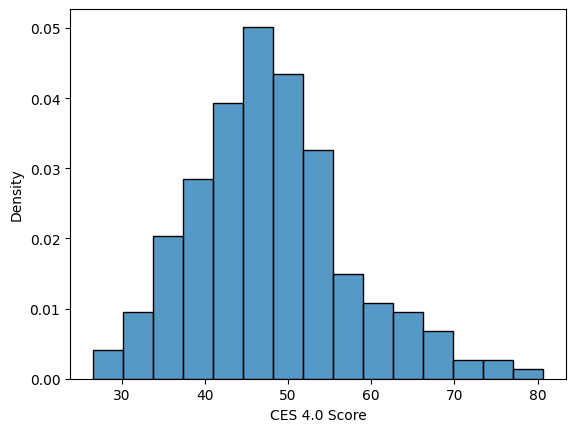

In [19]:
sns.histplot(ces_subset, x='CES 4.0 Score', stat='density')
plt.title('The Distribution of CES 4.0 Score Across Census Tracts');

**Question 3.1.1:** Write 1-2 sentences describing the distribution of `CES 4.0 score` based on the histogram above.

*YOUR ANSWER HERE...*

**Question 3.1.1:** Plot a histogram showing the distribution of `Asthma` across census tracts using `ces_set`. Be sure to include a title for your plot. 

In [ ]:
# TODO: Write code to plot a histogram of Asthma using seaborn

... 

Describe the distribution in 1-2 sentences.

*YOUR ANSWER HERE...*

### 3.2 Violin Plots

What if we went to compare the distributions of multiple attributes at once? We can use a **violin plot** which shows the distribution of data points after grouping by one (or more) variables. To create a violin plot, we will use seaborn's `.violinplot()` function. For more information, refer to the function [documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

In [46]:
# Run this code cell

cities = ['Los Angeles', 'San Bernardino', 'East Los Angeles', 'Compton']
ces_cities = ces[['Approximate Location', 'CES 4.0 Score', 'PM2.5', 'Asthma', 'Pollution Burden Score', 'Low Birth Weight', 'Education','Poverty', 'Housing Burden']]
ces_cities = ces_cities[ces_cities['Approximate Location'].isin(cities)]

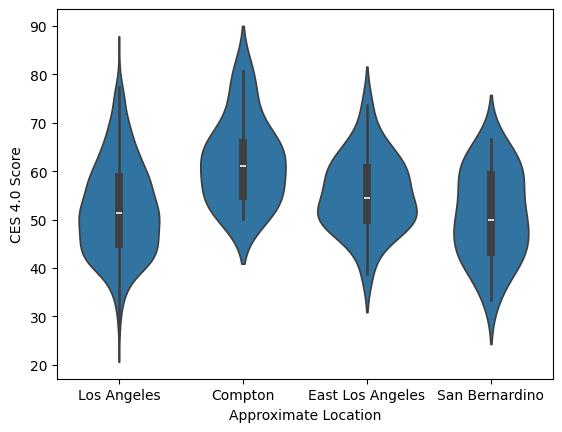

In [48]:
sns.violinplot(ces_cities, x='Approximate Location', y='CES 4.0 Score');

**Question 3.2.1:** Write down 2-3 observations based on the violinplot above.

*YOUR ANSWER HERE...*

### 3.3 Correlations

For the final part of the visualization section, we will briefly discuss how visualizations can help our understanding of relationships between column attributes in our data. 

First, we will begin with pairplots in seaborn. Pairplots allow us to visualize pairwise relationships of column attributes in our data. To create a pairplot, we will call [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) and pass in a DataFrame. This will create an $n x n$ grid of plots where n is the number of columns in our data. The histograms along the diagonal of a pairplot describe the distributions of each column attribute. The remaining scatterplots depict the relationship between two columns in the data. Run the following code cell to generate a pairplot. 

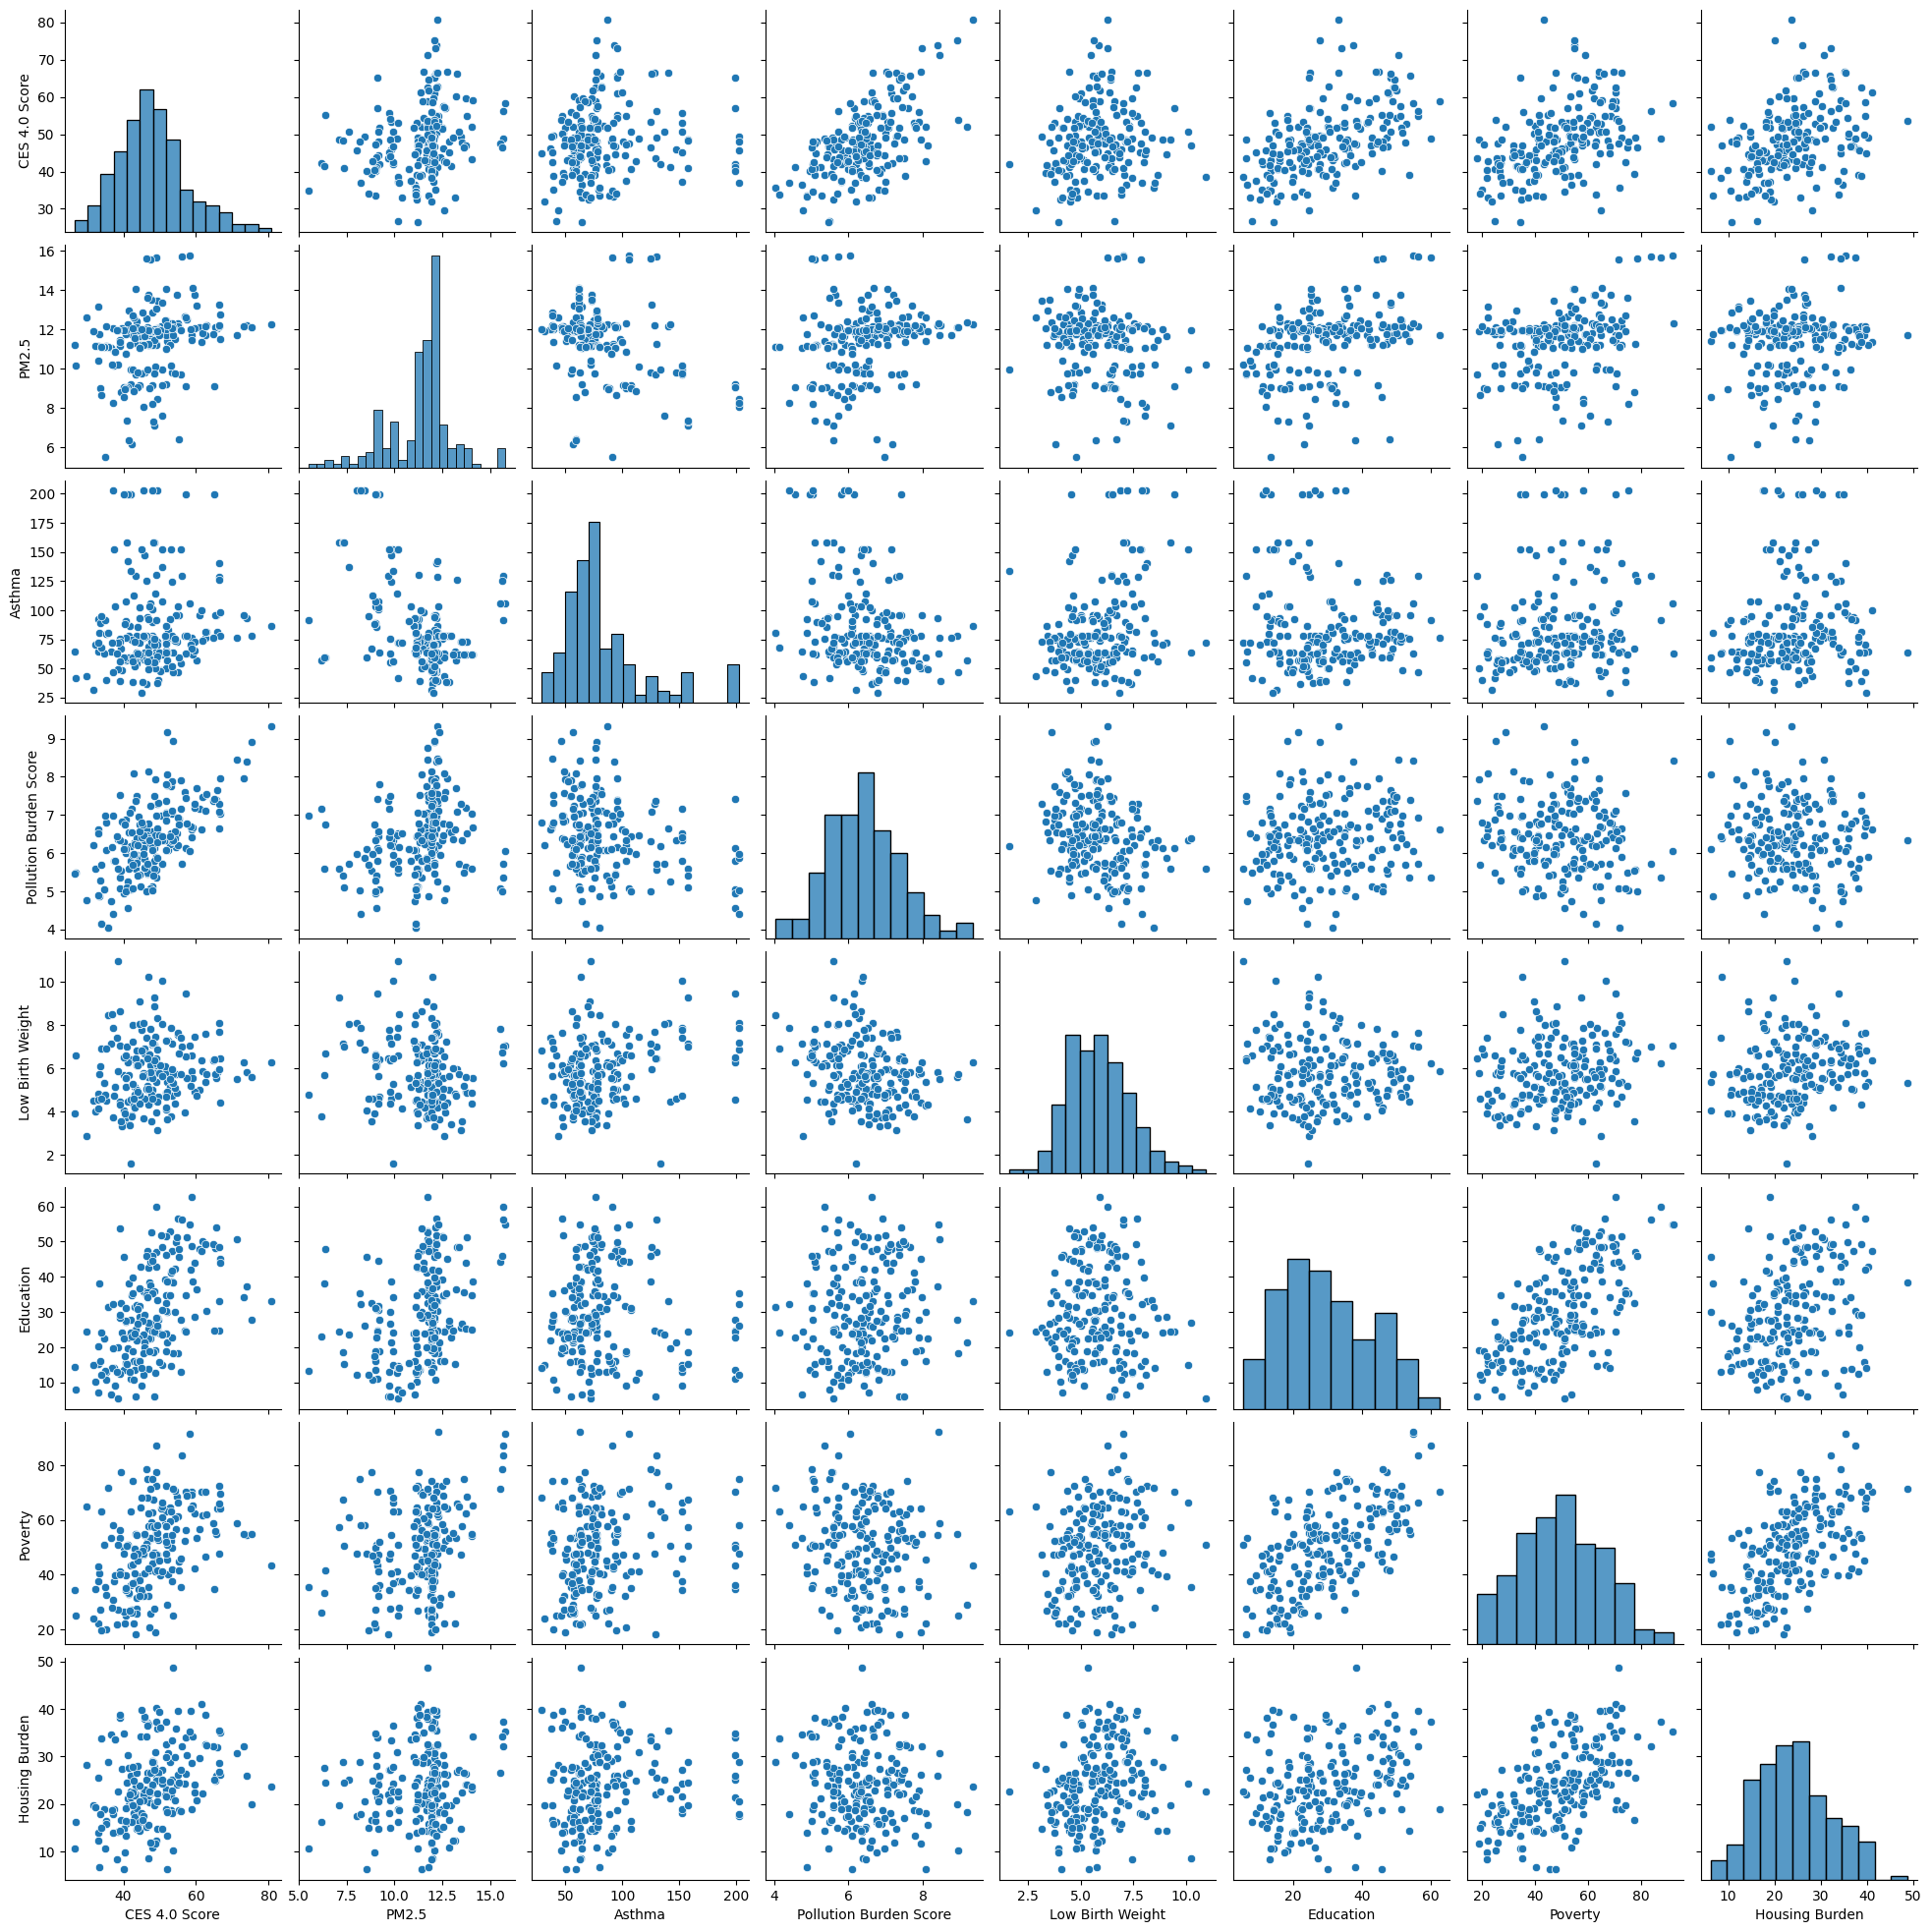

In [53]:
sns.pairplot(ces_subset);

**Question 3.3.1:** From this plot we can see that `Poverty` and `Housing Burden` seem to have a positive, linear relationship which is indicated the scatter of points that fall along a line with a positive slope. What other relationships do you see in the pairplot?

*YOUR ANSWER HERE...*

We can also draw some simple, but powerful analyses by observing the correlation between variables in our data. The code cell below computes the correlation coefficient between various socioeconomic variables in our data and plots a **heatmap** of these coefficients. A heatmap is a visualization that represents the magnitude of values using color. It allows us to easily observe the magnitudes of correlation across pairs of variables.

Run the code cell below and interpret the heatmap.

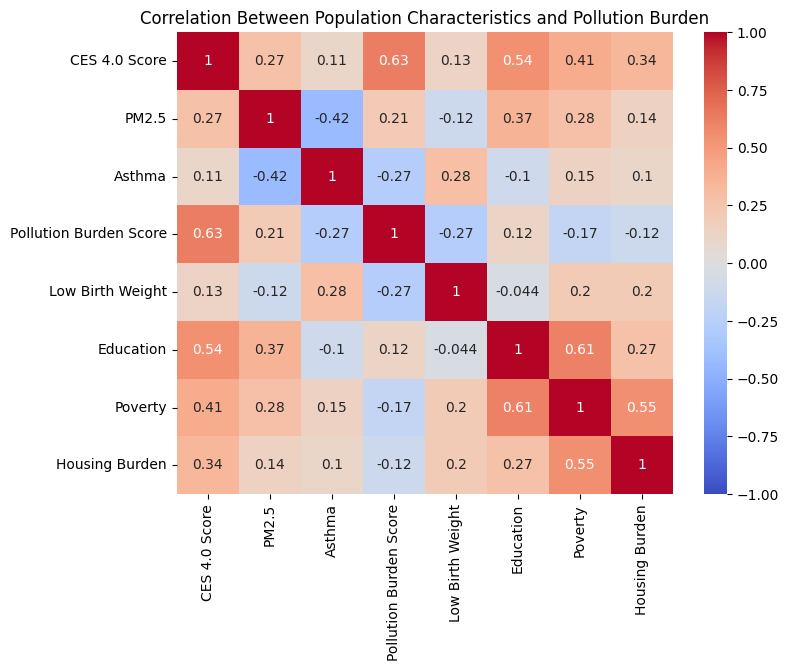

In [27]:
# Create a correlation matrix
corr_matrix = ces_subset.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Population Characteristics and Pollution Burden')
plt.show()

**Question 3.3.2:** Which variables are strongly correlated with each other, in either the positive or negative direction? Why might these variables be strongly correlated with one another?

*YOUR ANSWER HERE...*

### 3.4 (Optional) Geopandas Section

CalEnviroScreen is also a mapping tool that allows us to visualize the socioeconomic disparities across California. We will be using a package called `geopandas` to facilitate this mapping. 

The following code cell reads in a shape file (.shp) and contains information that will allow us to map the data using geopandas. A shapefile is a popular geospatial vector data format that stores the geometry of the features in our data. They are common for handling geospatial data. Simply run the cell below to read in the shapefile associated with CalEnviroScreen.

In [49]:
# Run this code cell

file_path = 'calenviroscreen40shpf2021shp/CES4 Final Shapefile.shp'
gdf = gpd.read_file(file_path)
gdf.head()

,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
0,6.083002e+09,93454,Santa Barbara,Santa Maria,4495,36.019653,69.162885,0.034190,10.566273,7.567724,...,12.5028,68.9210,20.8899,0.4004,0.2670,1.3126,6999.357689,2.847611e+06,8.2091,"POLYGON ((-39795.07 -341919.191, -38126.384 -3..."
1,6.083002e+09,93455,Santa Barbara,Santa Maria,13173,37.030667,70.637922,0.035217,11.561917,7.624775,...,5.3519,78.6229,13.2240,2.5051,0.0000,0.9489,19100.578232,1.635292e+07,4.6990,"POLYGON ((-39795.07 -341919.191, -39803.632 -3..."
2,6.083002e+09,93454,Santa Barbara,Santa Maria,2398,31.213140,61.069087,0.034190,10.566273,7.548835,...,12.8857,65.7214,30.6088,0.9591,0.0000,2.1685,4970.985897,1.352329e+06,0.5421,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,93455,Santa Barbara,Orcutt,4496,6.639331,5.988401,0.036244,13.615432,7.660570,...,14.4128,22.9537,69.1948,0.9342,0.7117,2.5356,6558.956012,2.417717e+06,3.6699,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,93455,Santa Barbara,Orcutt,4008,14.022852,23.121533,0.036244,13.615432,7.663210,...,18.8872,33.4082,59.7804,0.6986,1.4721,1.3723,6570.368730,2.608422e+06,3.2685,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


We can call `.plot()` to map the data.

<Axes: >

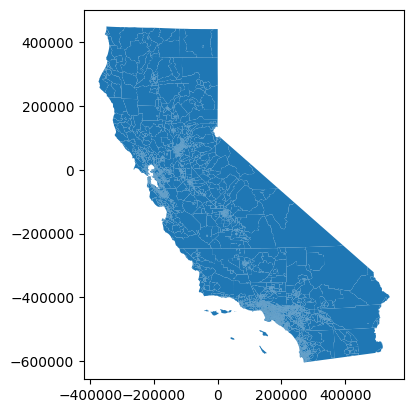

In [50]:
# map the data
gdf.plot()

**Question 3.4.1:** Like we did with the `ces` and `colleges` DataFrames, let's merge the gdf data with collegecodes_public. Following the format from before, merge the necessary datasets on zipcode. 

In [ ]:
# TODO: Fill in the ellipses

enviro_cc_shp = pd.merge(..., ..., how=..., left_on=..., right_on=...)
enviro_cc_shp.head()

We can use geopandas to visualize the spread of our metrics, like `Pollution Burden`. Run the following code cell below. The left plot displays the spread of pollution burden score across California and the right plot displays the spread of poverty across California.  

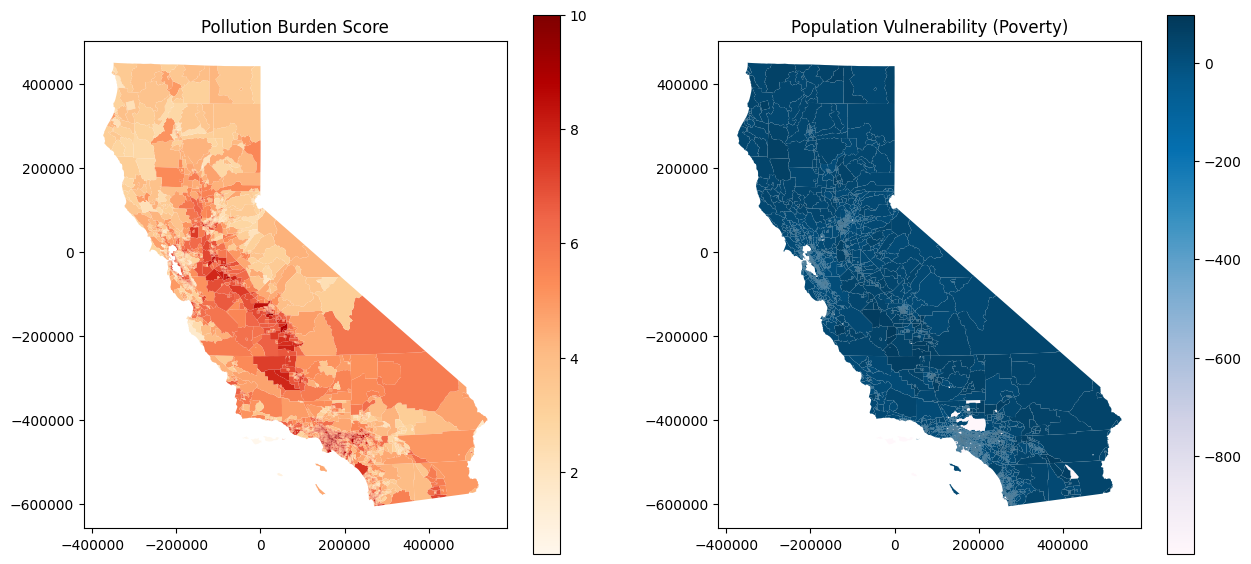

In [51]:
# Create a figure with subplots to compare pollution burden and population vulnerability
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot Pollution Burden on the left
gdf.plot(column='PolBurdSc', ax=ax[0], legend=True, cmap='OrRd')
ax[0].set_title('Pollution Burden Score')

# Plot Population Vulnerability on the right (example with 'Poverty' column)
gdf.plot(column='Poverty', ax=ax[1], legend=True, cmap='PuBu')
ax[1].set_title('Population Vulnerability (Poverty)')

plt.show()

**Question:** List an observation from each plot and how it relates to environmental justice.  

*YOUR ANSWER HERE...*

---

## 4. Data-driven Decision Making

Throughout this notebook, you gained valuable information about how to manipulate data to draw powerful analyses about socioeconomic disparaties across Los Angeles and California. Tools like CalEnviroScreen are essential for evaluating environmnetal justice because they help identify and prioritize communities that face higher environmnetal and health risks due to disproportionate effects of pollution. 

**Question 4.1:** Can you think of how an analysis of two other variables in the data not used in this notebook may be helpful for identifying marginalized communities? You may use the optional code cell as scratch work.

*YOUR ANSWER HERE...*

In [ ]:
# Optional code cell for scratch work

**Question 4.2:** In 3-4 sentences, how might access to CalEnviroScreen data help guide resource allocation and inform policymaking? How might different stakeholders (e.g., local governments, advocacy groups, researchers) use CalEnviroScreen data differently? Give examples of specific decisions or actions they might take.

*YOUR ANSWER HERE...*

**Question 4.3:** Finally, when working with data it is important to address the fundamental concept of **bias**. What potential biases might exist in the CalEnviroScreen data collection or analysis process? How could these biases impact the conclusions drawn from the data?

*YOUR ANSWER HERE...*

---

# Congratulations, you are finished with the notebook!

---

# (Optional) Using Machine Learning on CalEnviroScreen to Identify Susceptible Communities